# Exam 2
Instructions in Exam II.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx = 8.0             # Box dimension in x
Ly = np.sqrt(3) * Lx / 2  # Box dimension in y (triangular lattice)
temperature = 1.0    # Initial temperature (zero initial velocity)
dt = 0.005            # Time step
total_time = 8.0    # Total simulation time (units)
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

# Calculate the total energy of the system
sim.compute_energy()
total_energy = sim.total_energy
print(f"Initial total energy of the system: {total_energy:.3f}")

# Run the simulation and measure temperature and pressure
print(f"Running simulation with {N} particles for {num_steps} steps...")
start_time = time.time()

total_energy = []
temperatures = []
pressures = []
times = []

for i in range(num_steps):
    sim.step()

    # Record energy, temperature, and pressure
    total_energy.append(sim.total_energy)
    temperatures.append(sim.temperature)
    pressures.append(sim.pressure)
    times.append(i * dt)

    # Print progress updates
    if (i+1) % (num_steps // 20) == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Initial total energy of the system: 18.088
Running simulation with 64 particles for 1600 steps...
Progress: 100.0% | Step: 1600/1600 | Time: 9.4s | ETA: 0.0s | T: 0.552 | P: 43.415
Simulation completed in 9.35 seconds


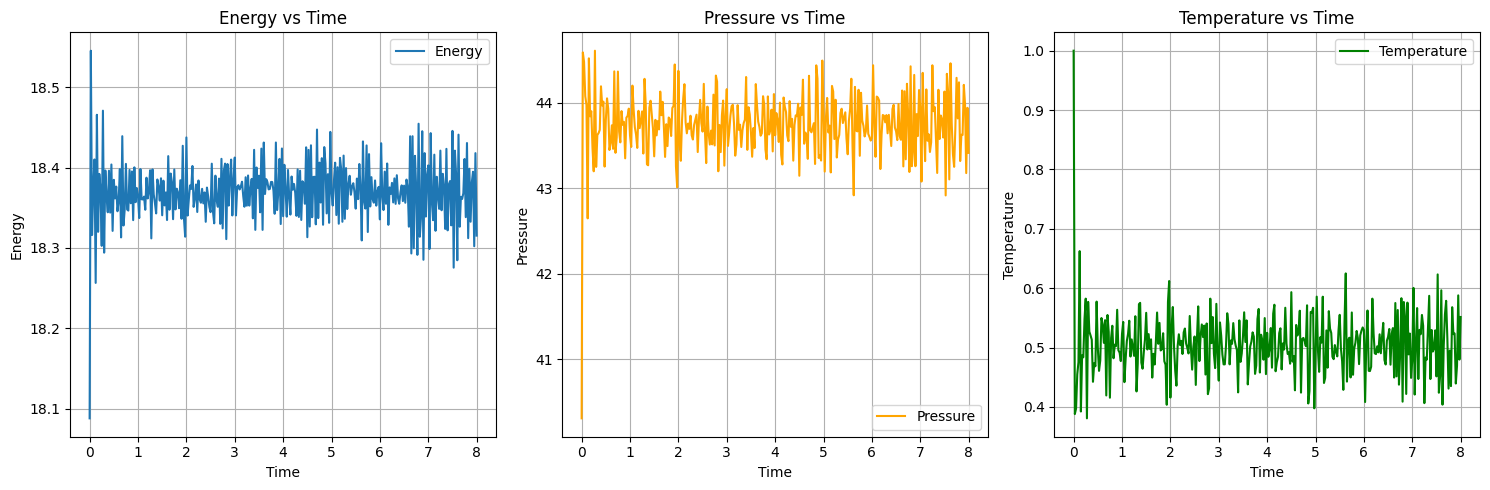

In [4]:
from LJVisualizer import LJVisualizer

# Create a visualizer object
viz = LJVisualizer(sim)

viz.plot_metrics()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx_0 = 9.0             # Box dimension in x
Ly_0 = np.sqrt(3) * Lx / 2  # Box dimension in y (triangular lattice)
temperature = 1.0    # Initial temperature (zero initial velocity)
dt = 0.005            # Time step
total_time = 8.0    # Total simulation time (units)
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

# Calculate the total energy of the system
sim.compute_energy()
total_energy = sim.total_energy
print(f"Initial total energy of the system: {total_energy:.3f}")

# Run the simulation and measure temperature and pressure
print(f"Running simulation with {N} particles for {num_steps} steps...")
start_time = time.time()

total_energy = []
temperatures = []
pressures = []
times = []

box_size = []

for i in range(num_steps):
    sim.step()

    # Change the box size on every step
    A = 1.2
    y = 2.5
    new_Lx = A * np.sin((2 * np.pi / y) * (i * dt)) + Lx_0
    new_Ly = A * np.sin((2 * np.pi / y) * (i * dt)) + Ly_0
    sim.set_box_size(new_Lx, new_Ly)

    # Record energy, temperature, and pressure
    box_size.append((new_Lx, new_Ly))
    total_energy.append(sim.total_energy)
    temperatures.append(sim.temperature)
    pressures.append(sim.pressure)
    times.append(i * dt)

    # Print progress updates
    if (i+1) % (num_steps // 20) == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Initial total energy of the system: 18.088
Running simulation with 64 particles for 1600 steps...
Progress: 100.0% | Step: 1600/1600 | Time: 18.9s | ETA: 0.0s | T: 0.303 | P: -0.751
Simulation completed in 18.89 seconds


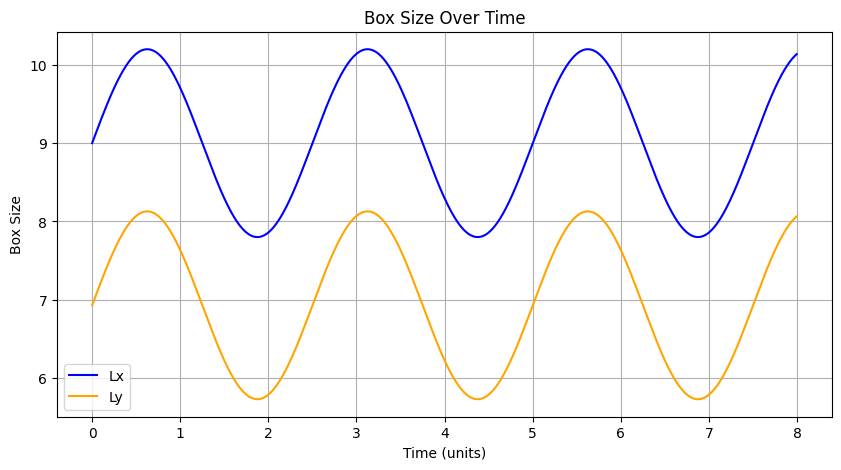

In [6]:
# Plot the box size over time
plt.figure(figsize=(10, 5))
plt.plot(times, [size[0] for size in box_size], label='Lx', color='blue')
plt.plot(times, [size[1] for size in box_size], label='Ly', color='orange')
plt.xlabel('Time (units)')
plt.ylabel('Box Size')
plt.title('Box Size Over Time')
plt.legend()
plt.grid()
plt.show()

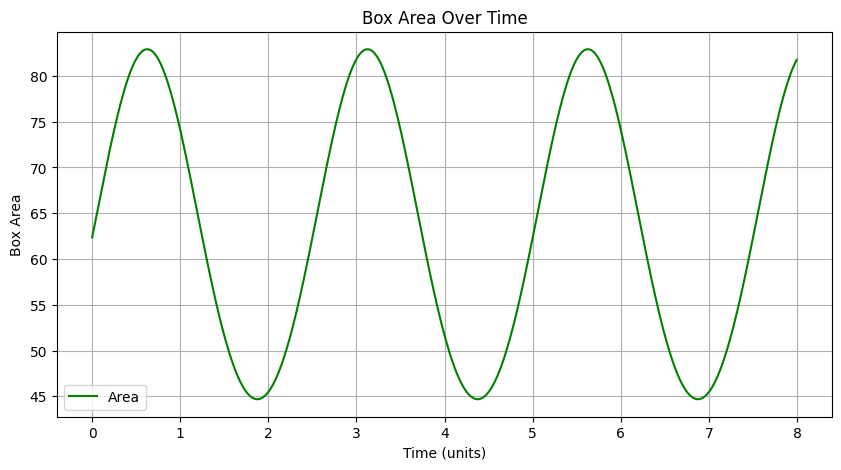

In [7]:
# Plot the box area over time
plt.figure(figsize=(10, 5))
plt.plot(times, [size[0] * size[1] for size in box_size], label='Area', color='green')
plt.xlabel('Time (units)')
plt.ylabel('Box Area')
plt.title('Box Area Over Time')
plt.legend()
plt.grid()
plt.show()

In [10]:
# Question 2: Work out when the densities are maximum and minimum
# Find the time at which the box area is a minimum
# When the box area is a minimum, the density of the particles is maximum
min_area_time = times[np.argmin([size[0] * size[1] for size in box_size])]
print(f"Minimum box area occurs at time: {min_area_time:.2f} units -- density is maximum")

# Find the time at which the box area is a maximum
# When the box area is a maximum, the density of the particles is minimum
max_area_time = times[np.argmax([size[0] * size[1] for size in box_size])]
print(f"Maximum box area occurs at time: {max_area_time:.2f} units -- density is minimum")

Minimum box area occurs at time: 1.88 units -- density is maximum
Maximum box area occurs at time: 0.62 units -- density is minimum


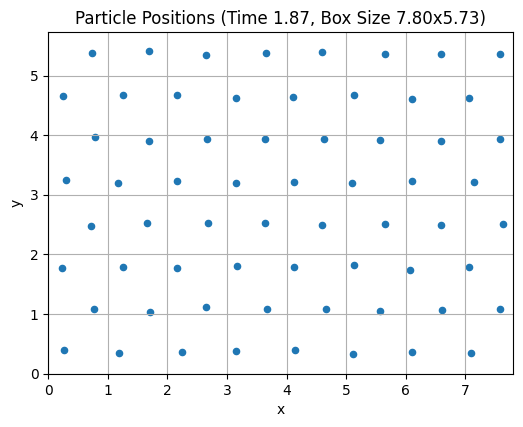

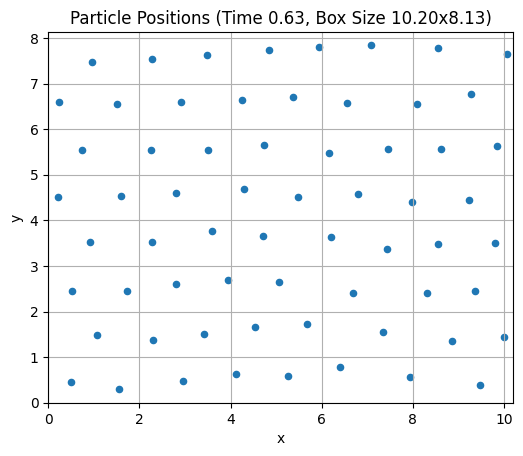

In [ ]:
from LJVisualizer import LJVisualizer

# Create a visualizer object
viz = LJVisualizer(sim)

# Plot the particles at maximum density
viz.plot_positions(time=1.88)

# Plot the particles at minimum density
viz.plot_positions(time=0.62)

In [ ]:
# Sanity check
viz.animate_positions()

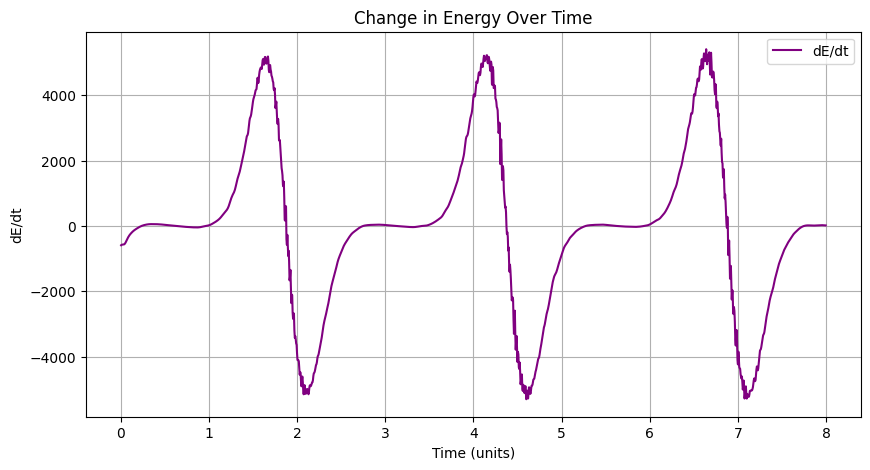

In [ ]:
# Plot delta E / delta t
plt.figure(figsize=(10, 5))
plt.plot(times[1:], np.diff(total_energy) / dt, label='dE/dt', color='purple')
plt.xlabel('Time (units)')
plt.ylabel('dE/dt')
plt.title('Change in Energy Over Time')
plt.legend()
plt.grid()
plt.show()

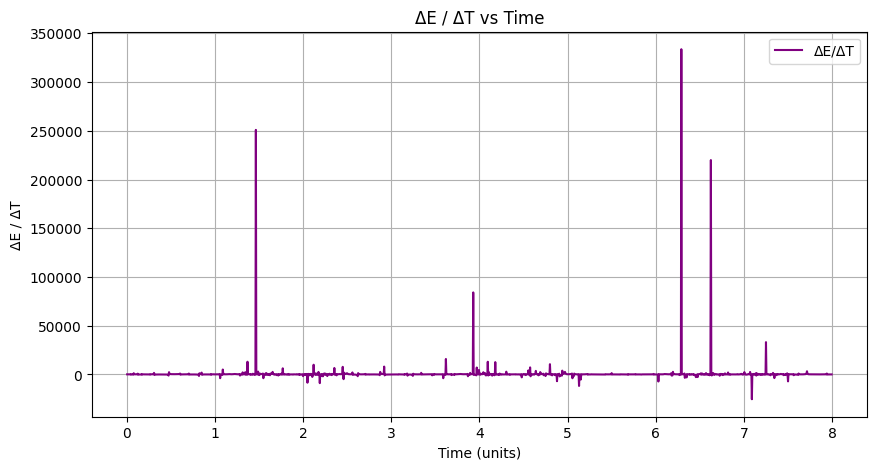

In [34]:
# Plot ΔE / ΔT - I graphed the wrong thing above, this looks more correct for ΔE / ΔT
plt.figure(figsize=(10, 5))
plt.plot(times[1:], np.diff(total_energy) / np.diff(temperatures), label='ΔE/ΔT', color='purple')
plt.xlabel('Time (units)')
plt.ylabel('ΔE / ΔT')
plt.title('ΔE / ΔT vs Time')
plt.legend()
plt.grid()
plt.show()

4(a). Is energy conserved across a single cycle? Why or why not? Are deviations in energy conservation from the physics of the simulation, or are they the result of numerical approximation?

I believe that based on the below plot of a single cycle that energy is conserved across a single cycle. Using the above graph of energy over time I visually chose the cycle t=1.0 to t=3.0. While the box shrinks the energy, pressure and temp increase as we'd expect, but it returns back to its base state at t=1.0. Using our previous simulations there the box stayed constant, we observed energy fluctuations when we zoomed in on it a lot, but at a macro scale we saw that energy was a straight line indicating that energy was conserved. Now that we are shrinking the box it's reasonable to logic that energy increases as the box shrinks, and decreases back when the box grows.

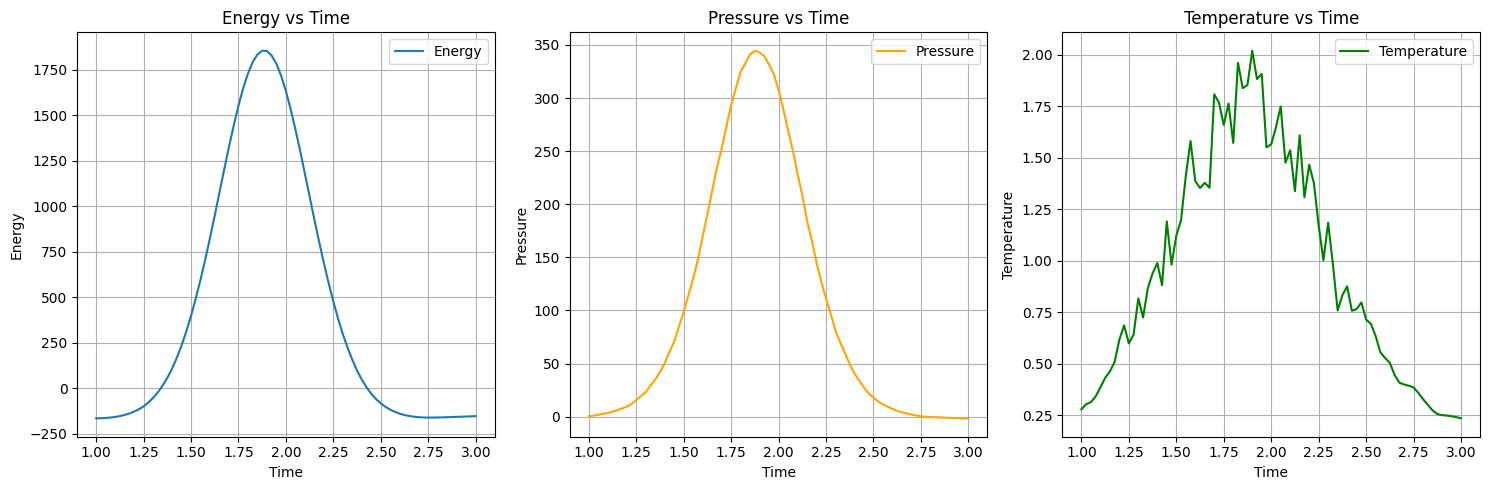

In [15]:
viz.plot_metrics(start_time=1.0, end_time=3.0)

4(b). Is energy conserved between cycles? Why or why not? Are deviations in energy conservation from the physics of the simulation, or are they the result of numerical approximation?

I wish I had a better way to represent the following graphs, perhaps with more cycles and lines to fit the peaks and troughs in the below plots. I'm afraid to re-run the simulation and lose my numbers, so I will stick with these plots and explain my reasoning.

I can see that with each cycle the peaks of the energy graph get slightly higher. Thought I don't visibly see variations in the troughs. Based on this observation I would conclude that energy _is not_ conserved between cycles. I am convinced that this is due to the numerical approximation of the simulation. While decoupling my simulator and visualizer, I observed some really chaotic behaviors in my particle position plots. I was running those with total time 50, which I realized is way too much. But, even with this simulation running for 8 time units, I'm convinced that energy is not conserved between cycles as most noticeably evidenced by the rise in each of the successive peaks of the energy graph.

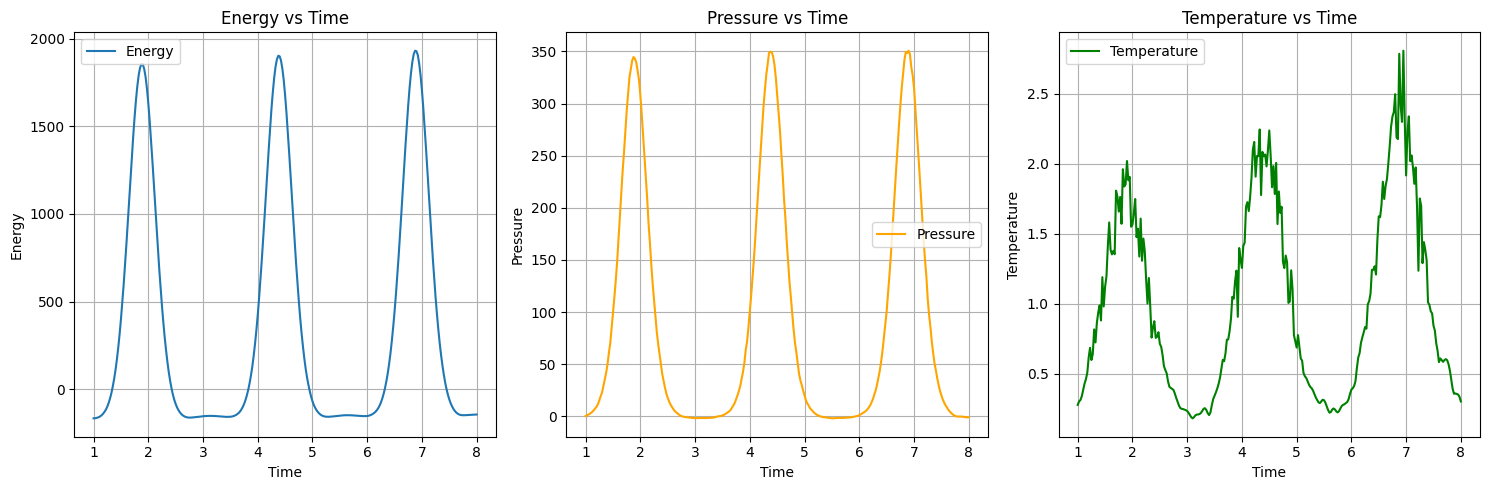

In [17]:
viz.plot_metrics(start_time=1.0, end_time=8.0)

4(c). Do phase transitions occur? How do you know? How would you describe them, eg solid to liquid, liquid to gas, etc?

Based on my sanity animation above. I don't believe that there are phase transitions occuring here. It's possible I may not be interpreting the visual correctly, but by (1) visual inspection of the particles, and (2) I don't see any sudden pressure drops, and (3) the particles appear to remain relatively localized to their lattice sites. However, one thing that makes me question myself here is the visible increase in particle vibration when the box shrinks.

#### 5. Repeat the experiment keeping the temperature as close to constant as possible by calling your version of Gould's setTemperature function every time step. Update velocities accordingly. Keep the temperature at kT=1. Address the following questions a second time.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx_0 = 9.0             # Box dimension in x
Ly_0 = np.sqrt(3) * Lx / 2  # Box dimension in y (triangular lattice)
temperature = 1.0    # Initial temperature (zero initial velocity)
dt = 0.005            # Time step
total_time = 8.0    # Total simulation time (units)
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

# Calculate the total energy of the system
sim.compute_energy()
total_energy = sim.total_energy
print(f"Initial total energy of the system: {total_energy:.3f}")

# Run the simulation and measure temperature and pressure
print(f"Running simulation with {N} particles for {num_steps} steps...")
start_time = time.time()

total_energy = []
temperatures = []
pressures = []
times = []

box_size = []

for i in range(num_steps):
    sim.step()

    # Change the box size on every step
    A = 1.2
    y = 2.5
    new_Lx = A * np.sin((2 * np.pi / y) * (i * dt)) + Lx_0
    new_Ly = A * np.sin((2 * np.pi / y) * (i * dt)) + Ly_0
    sim.set_box_size(new_Lx, new_Ly)

    # Reset the temperature to kT=1 every time step
    sim.set_temperature(target_temperature=1.0)
    sim.set_velocities()

    # Record energy, temperature, and pressure
    box_size.append((new_Lx, new_Ly))
    total_energy.append(sim.total_energy)
    temperatures.append(sim.temperature)
    pressures.append(sim.pressure)
    times.append(i * dt)

    # Print progress updates
    if (i+1) % (num_steps // 20) == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Initial total energy of the system: 18.088
Running simulation with 64 particles for 1600 steps...
Progress: 100.0% | Step: 1600/1600 | Time: 18.8s | ETA: 0.0s | T: 1.000 | P: -1.849
Simulation completed in 18.85 seconds


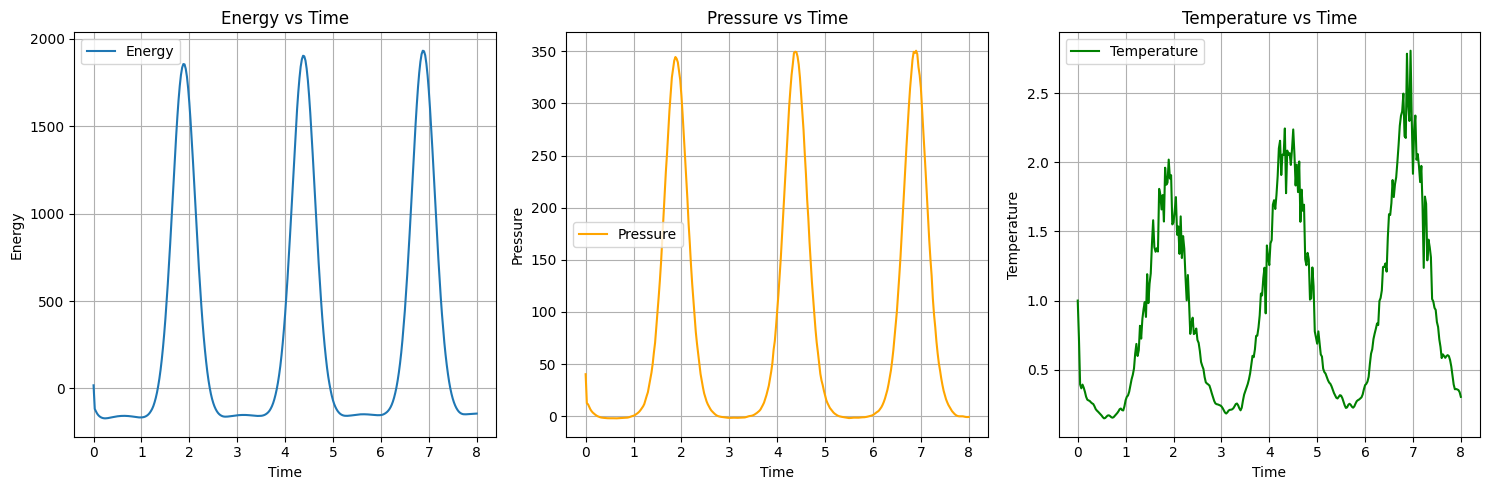

In [22]:
viz.plot_metrics()

I was expecting that reseting the temperature to kT=1.0 during each time step would have showed plots that that would have showed energy being conserved throughout the simulation, but they look pretty much identical to the previous ones, so my responses remain the same. It's possible that I've done something wrong here, but I will try removing the drift for the next simulation as that seemed to help when we worked problem 8.5.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx_0 = 9.0             # Box dimension in x
Ly_0 = np.sqrt(3) * Lx / 2  # Box dimension in y (triangular lattice)
temperature = 1.0    # Initial temperature (zero initial velocity)
dt = 0.005            # Time step
total_time = 8.0    # Total simulation time (units)
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

# Calculate the total energy of the system
sim.compute_energy()
total_energy = sim.total_energy
print(f"Initial total energy of the system: {total_energy:.3f}")

# Run the simulation and measure temperature and pressure
print(f"Running simulation with {N} particles for {num_steps} steps...")
start_time = time.time()

total_energy = []
temperatures = []
pressures = []
times = []

box_size = []

for i in range(num_steps):
    sim.step()

    # Change the box size on every step
    A = 1.2
    y = 2.5
    new_Lx = A * np.sin((2 * np.pi / y) * (i * dt)) + Lx_0
    new_Ly = A * np.sin((2 * np.pi / y) * (i * dt)) + Ly_0
    sim.set_box_size(new_Lx, new_Ly)

    # This time let's try removing the drift on every time step
    sim.remove_drift()

    # Record energy, temperature, and pressure
    box_size.append((new_Lx, new_Ly))
    total_energy.append(sim.total_energy)
    temperatures.append(sim.temperature)
    pressures.append(sim.pressure)
    times.append(i * dt)

    # Print progress updates
    if (i+1) % (num_steps // 20) == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Initial total energy of the system: 18.088
Running simulation with 64 particles for 1600 steps...
Progress: 100.0% | Step: 1600/1600 | Time: 19.0s | ETA: 0.0s | T: 0.485 | P: -0.496
Simulation completed in 19.00 seconds


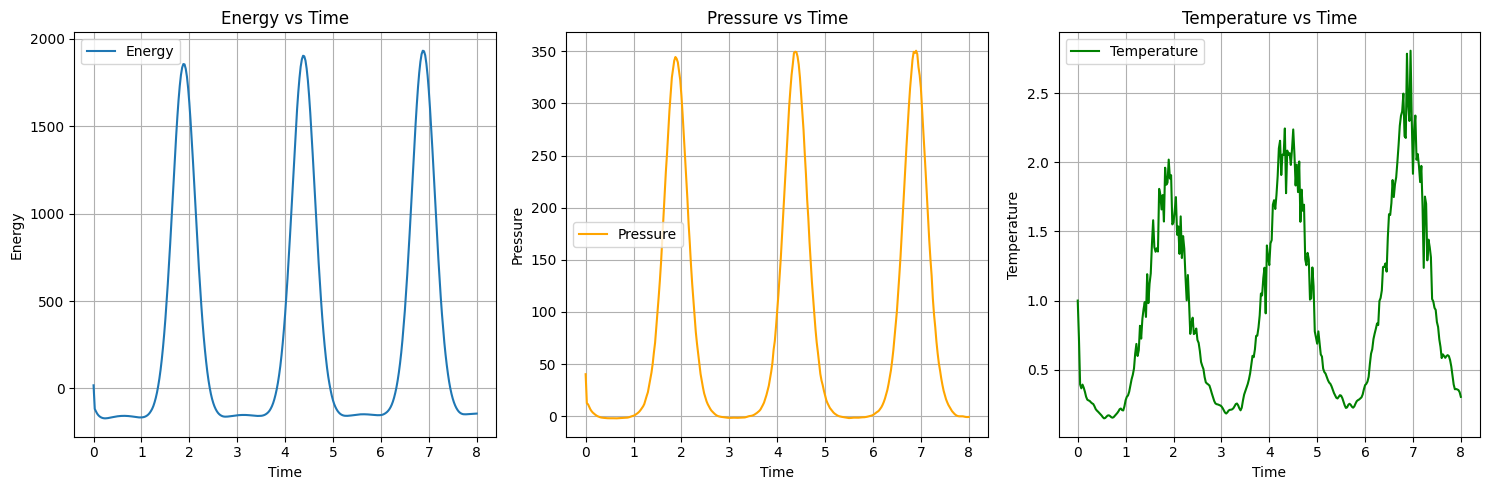

In [24]:
viz.plot_metrics()

6. You may have noticed that while the temperature is set to kT=1, it wanders away from that value. Come up with a theory of why that is, state your theory, and test it by modifying something in your code and conducting another run. Add relevant support for your theory/test in the form of output plots and commentary.

Well my theory for removing the drift on every time step didn't seem to work either. Given more time I would have edited the simulation code to store the individual simulation results seperately - just in case I'm accidentally plotting the same results each time. Though each new simulation here should have overwritten the results of the previous.

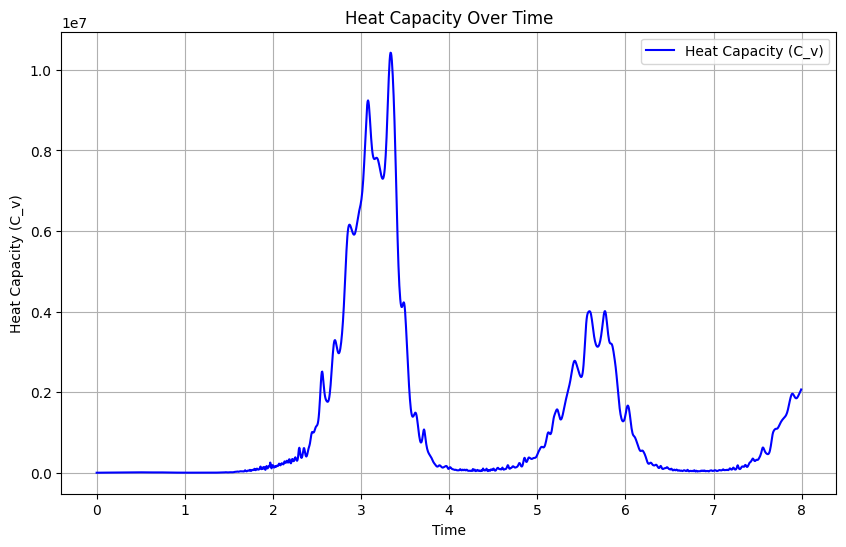

In [31]:
# Calculate heat capacity over time
heat_capacity_history = []
for t in range(len(total_energy)):
    mean_energy_t = np.mean(total_energy[:t+1])
    mean_energy_squared_t = np.mean(np.square(total_energy[:t+1]))
    temperature_t = temperatures[t]
    temperature_squared_t = temperature_t ** 2

    if temperature_squared_t > 0:  # Avoid division by zero
        k_B = 1.0 # hack to get this last graph to work
        C_v_t = (mean_energy_squared_t - mean_energy_t**2) / (k_B * temperature_squared_t)
        heat_capacity_history.append(C_v_t)
    else:
        heat_capacity_history.append(0)

# Plot heat capacity over time
plt.figure(figsize=(10, 6))
plt.plot(times, heat_capacity_history, label='Heat Capacity (C_v)', color='blue')
plt.xlabel('Time')
plt.ylabel('Heat Capacity (C_v)')
plt.title('Heat Capacity Over Time')
plt.grid()
plt.legend()
plt.show()

Last minute: I wanted to try to put this in here, though I can't be sure of the validity of this graph, so I don't want to guess if these humps are indications of phase changes or not.